# <font style = "color:rgb(50,120,229)">Deep Learning based Face Recognition using Dlib</font>
In this chapter, we will be using the Deep Learning based Face Recognition model in Dlib. The Dlib model is more accurate than OpenFace. It has an accuracy of 99.38% on the LFW banchmark.

# <font style = "color:rgb(50,120,229)">Opening the Deep Learning blackbox</font>

In the previous section we treated Deep Learning as a blackbox. The details of Deep Learning will be covered in the next module. In this section we will open it just a tiny bit to understand how face recognition works in Dlib. 

However, before we do that it is important to refresh our understanding of the traditional image classification pipeline shown in Figure 1. 

| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-traditionalImageClassification.jpg"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-traditionalImageClassification.jpg"/></a></center> | 
| -------- | 
| <center>Figure 1: Traditional image classification pipeline.</center>     |

In a traditional image classification pipeline, we converted the image into a feature vector ( or equivalently a point) in higher dimensional space. This was done by calculating the feature descriptor (e.g. HOG) for an image patch. Once the image was represented as a point in higher dimensional space, we could use a learning algorithm like SVM to partition the space using hyperplanes that separated points representing different classes. 

Even though on the surface Deep Learning looks very different from the above model, there are conceptual similarities. Figure 2 reveals the Deep Learning module used by Dlib’s Face Recognition module. The architecture is based on a popular network called ResNet. 

| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-resnet.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-resnet.png"/></a></center> | 
| -------- | 
| <center>Figure 2: Dlib’s Face Recognition module is based on an CNN architecture called ResNet. ResNet contains a bank of Convolutional Layers followed by one Fully Connected Layer.</center>     |


As most CNN architectures, ResNet contains a bank of Convolutional (Conv) Layers followed by a Fully Connected (FC) Layer. 

The bank of conv layers produce a feature vector in higher dimensional space just like the HOG descriptor. So what’s the difference between a bank of conv layers and HOG descriptor? The most important differences are 

1. HOG is a fixed descriptor. There is an exact recipe for calculating the descriptor. On the other hand, a bank of conv layers contains many convolution filters. These filters are learned from the data. So unlike HOG, they adapt based on the problem at hand. 

2. The FC layer does the same job as the SVM classifier in traditional approaches. It classifies the feature vector. In fact, sometimes the final FC layer is replaced by an SVM. 

Before we move forward, we need to understand a concept called a **metric**. 

# <font style = "color:rgb(50,120,229)">What is a Metric?</font>

Usually, when we want to use the word "distance" between two points we are talking about the Euclidean distance between them. For example, the distance between 3D points ( 1, 0, 1) and ( 1,  3, 5) is 

$$
\sqrt {( 1 − 1 ) ^2 + ( 3 − 0 ) ^2 + ( 5−1 )^2 ) } = 5 
$$  

In general if we have an n dimensional vectors $\pmb x$ and $\pmb y$ the L2 distance ( also called the Euclidean distance ) is given by 

$$
d_{L2} = || \pmb{x} − \pmb{y} || = \left [ ( \pmb{x} − \pmb{y} ) ^ T( \pmb{x} − \pmb{y} )  \right ]^{\frac{1}{2}} =  \left ( \sum^n_{i=1} ( x_i − y_i ) ^ 2  \right )^{\frac{1}{2}}
$$

However, in mathematics a distance ( also known as a **metric** ) has a much broader definition. For example, a different kind of distance is called the L1 distance. It is the sum of absolute values of elements of the two vectors. 

$$
d_{L1}  = \sum^n_{i=1} | x_i − y_i | 
$$

The following rules define when a function involving two vectors can be called a metric. A mapping  $d(\pmb{x},\pmb{y})$ is called a metric if 

1. The distance between any two points is greater than or equal to zero $d(\pmb{x},\pmb{y})\geq0$

2. A point has zero distance from itself. 
$d(\pmb x,\pmb x)=0$

3. The distance from $\pmb x$ to $\pmb y$ is the same as the distance from $\pmb y$  to $\pmb x$. 
$d(\pmb x,\pmb y)=d(\pmb y,\pmb x)$

4. Triangle inequality: For any three points $\pmb x$, $\pmb y$, and $\pmb z$, the following inequality holds true
$d(\pmb{x},\pmb{y}) + d(\pmb{y},\pmb{z}) \geq  d(\pmb{z},\pmb{x})$

# <font style = "color:rgb(50,120,229)">Deep Metric Learning</font>

Any image can be vectorized by simply storing all the pixel values in a tall vector. This vector represents a point in higher dimensional space. However, this space is not very good for measuring distances. In a face recognition application, the points representing two different images of the same person may be very far away and the points representing images of two different people may actually be close by. 

When we used PCA to reduce dimensionality, we hoped distances in this reduced dimensional space would be more meaningful. Similarly, with Fisher’s Linear Discriminant we tried to find a space where distances were meaningful. Both approaches work to a certain extent but the performance is by no means exceptional. 

Deep Metric Learning is a class of techniques that uses Deep Learning to learn a lower dimensional effective metric space where images are represented by points such that images of the same class are clustered together and images of different class are far apart. Conceptually, the goals are very similar to Fisher’s Linear Discriminant but in practice the results are vastly superior because instead of directly reducing the dimension of the pixel space, the convolution layers first calculate the meaningful features which are then implicitly used to create the metric space. 

Turns out we can use the same CNN architecture we use for image classification for deep metric learning. In Figure 3, see a CNN that is trained to take as input a 150x150 color image ( which is the same as a vector of size 150x150x3 = 67,500 ) and output the probability that it belongs to one of the 128 different animal classes. 

| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-CNN.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-CNN.png"/></a></center> | 
| -------- | 
| <center>Figure 3: CNN for classification task</center>     |

You may recall from the previous section, to train this network we need to define a loss function that is minimized during training. For multi-class classification problems, the loss function used is called multi-class log loss. We will learn about this loss in the next module, but for now it suffices to know that the log loss is high when the output probability of an incorrect class is high. 

In Deep Metric Learning, the architecture remains the same, but the loss function is changed. As a result, the 128 numbers at the output no longer represent the probability of the input image being a particular class. Instead, the 128 numbers represent the embedding of the image in a 128 dimensional space where images of the same class are clustered together and images of different classes are far aways. 

| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-CNNmetricLearning.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-CNNmetricLearning.png"/></a></center> | 
| -------- | 
| <center>Figure 4: CNN for metric learning</center>     |

In other words, you input an image and the output is a point in 128 dimensional space. If you want to find how closely related two images are, you can simply find the pass both images through the CNN and obtain the two points in this 128 dimensional space. You can compare the two points using simple L2 ( Euclidean ) distance between them. 

## <font style = "color:rgb(50,120,229)">Metric Loss</font>

Millions of images are typically used to train a production ready CNN. Obviously these millions of images cannot be simultaneously used to update the knobs of the CNN.  Training is done iteratively using one small batch of images at a time. This small batch is called a **mini-batch**. 

As mentioned in the previous section, we need to define a new loss function so that the CNN output is a point in this 128 dimensional space. The loss function is defined over all pairs of images in a mini-batch.

| <center><a href="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-metricLoss.png"><img src="https://www.learnopencv.com/wp-content/uploads/2018/01/opcv4face-w9-m5-metricLoss.png"/></a></center> | 
| -------- | 
| <center>Figure 5: Metric loss defined by Dlib’s Face Recognizer. For simplicity, the concept is shown in 2D. The loss is defined in terms of two parameters 1) Threshold (T) and 2) Margin. The blue and the red dots present images of two different classes. For the metric loss to be 0, the maximum distance between any two points of the same class should be ( T - M ) and the minimum distance between any two points of different classes should be ( T + M )</center>     |

 Let $p_1$ and $p_2$ represent the points corresponding to images $I_1$ and $I_2$ in the 128 dimensional space. If the images belong to the same class, the loss is given by 

$$
\text{max}(0, || p_1 − p_2 || −  T + M ) 
$$

On the other hand, if $I_1$ and $I_2$ have two different class labels then their contribution to the loss function is:

$$
\text{max}(0, T − || p_1 − p_2 || + M)
$$

Figure 5 shows how this loss function prefers embedding where images of the same class are clustered together and images of different classes are separated by a large margin. 

## <font style = "color:rgb(50,120,229)">Hard Negative Mining</font>

In a mini-batch, there are many non-matching pairs ( images from different classes ) than matching pairs ( images from the same class ). It is important to take this imbalance into account while calculating the metric loss function. If there are N matching pairs that share the same class in a mini-batch then the algorithm includes ONLY the N worst non-matching pairs in the loss computation.  In other words, performs hard negative mining on the mini-batch by picks the worst non-matching pairs. 

# <font style = "color:rgb(50,120,229)">Training</font>

Dlib’s Face Recognizer was trained using about 3M images with 7485 different identities. The images were obtained by combining and cleaning up publicly available datasets. It is a tedious process the Davis King, the author of Dlib, mentions in this [blog post.](http://blog.dlib.net/2017/02/high-quality-face-recognition-with-deep.html) The training took about 1 day on a Titan X GPU. Fortunately, the model is shared by Davis and we do not need to retrain it. 

# <font style = "color:rgb(50,120,229)">Enrollment</font>

As discussed in the previus chapter, enrolling a person is done by simply passing a few images of the person through the network to obtain 128 dimensional feature descriptor corresponding to each image. Given a new image of the same person, we can verify if it is the same person by checking the distance between the enrolled face and the new face in the 128 dimensional space. 

In [1]:
import os
import _pickle as cPickle
import dlib
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

## <font style="color:rgb(50,120,229)">Load the model for face landmarks and face recognition</font>

Initialize Dlib’s Face Detector, Facial Landmark Detector and Face Recognition neural network objects



In [3]:
# Path to landmarks and face recognition model files
PREDICTOR_PATH = DATA_PATH + 'models/shape_predictor_68_face_landmarks.dat'
FACE_RECOGNITION_MODEL_PATH = DATA_PATH + 'models/dlib_face_recognition_resnet_model_v1.dat'

# Initialize face detector, facial landmarks detector 
# and face recognizer
faceDetector = dlib.get_frontal_face_detector()
shapePredictor = dlib.shape_predictor(PREDICTOR_PATH)
faceRecognizer = dlib.face_recognition_model_v1(FACE_RECOGNITION_MODEL_PATH)

## <font style="color:rgb(50,120,229)">Load the data for enrollment </font>

Persons’ images we are going to enroll are structured in following way:

`DATA_PATH/images/faces` folder will have subfolders

Each subfolder has images of one person

We will store this mapping of images and their corresponding labels to use it later in testing

In [5]:
# Now let's prepare our training data
# data is organized assuming following structure
# faces folder has subfolders.
# each subfolder has images of a person
faceDatasetFolder = DATA_PATH + 'images/faces'

# read subfolders in folder "faces"
subfolders = []
for x in os.listdir(faceDatasetFolder):
  xpath = os.path.join(faceDatasetFolder, x)
  if os.path.isdir(xpath):
    subfolders.append(xpath)

# nameLabelMap is dict with keys as person's name
# and values as integer label assigned to this person
# labels contain integer labels for corresponding image in imagePaths
nameLabelMap = {}
labels = []
imagePaths = []
for i, subfolder in enumerate(subfolders):
  for x in os.listdir(subfolder):
    xpath = os.path.join(subfolder, x)
    if x.endswith('jpg'):
      imagePaths.append(xpath)
      labels.append(i)
      nameLabelMap[xpath] = subfolder.split('/')[-1]

In [6]:
nameLabelMap

{'../data/images/faces\\satya\\face2_000326.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\face2_000757.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\intro_000007.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\intro_000103.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\intro_000151.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\making_000319.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\making_003991.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\satya_making_004146.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\satya_making_004208.jpg': 'faces\\satya',
 '../data/images/faces\\satya\\satya_making_004377.jpg': 'faces\\satya',
 '../data/images/faces\\vikas\\vikas_01.jpg': 'faces\\vikas',
 '../data/images/faces\\vikas\\vikas_03.jpg': 'faces\\vikas',
 '../data/images/faces\\vikas\\vikas_04.jpg': 'faces\\vikas',
 '../data/images/faces\\vikas\\vikas_07.jpg': 'faces\\vikas',
 '../data/images/faces\\vikas\\vikas_09.jpg': 'faces\\vikas',
 '../da

## <font style="color:rgb(50,120,229)">Process each image in the dataset and compute descriptors</font>

Process enrollment images one by and one. 

Convert image from RGB to BGR, because Dlib uses BGR as default format.

Detect faces in the image. For each face we will compute a face descriptor.

Note that here we have assumed that a single image will have face/faces of only one person. But in a practical scenario you will have images with multiple persons in an image. In such case you will have to maintain a mapping of each face descriptor and its corresponding label.

For each face get facial landmarks.

Compute face descriptor using facial landmarks. This is a 128 dimensional vector which represents a face. We will convert face descriptor from Dlib’s format to a NumPy array for ease of mathematical computations and read/write on disk.

For each face descriptor we will also save the corresponding label.
Order of face descriptor for each face in faceDescriptors NumPy array’s rows is same as the order of labels in variable index.

In [7]:
# Process images one by one
# We will store face descriptors in an ndarray (faceDescriptors)
# and their corresponding labels in dictionary (index)
index = {}
i = 0
faceDescriptors = None
for imagePath in imagePaths:
  print("processing: {}".format(imagePath))
  # read image and convert it to RGB
  img = cv2.imread(imagePath)

  # detect faces in image
  faces = faceDetector(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  print("{} Face(s) found".format(len(faces)))
  # Now process each face we found
  for k, face in enumerate(faces):

    # Find facial landmarks for each detected face
    shape = shapePredictor(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), face)

    # convert landmarks from Dlib's format to list of (x, y) points
    landmarks = [(p.x, p.y) for p in shape.parts()]

    # Compute face descriptor using neural network defined in Dlib.
    # It is a 128D vector that describes the face in img identified by shape.
    faceDescriptor = faceRecognizer.compute_face_descriptor(img, shape)

    # Convert face descriptor from Dlib's format to list, then a NumPy array
    faceDescriptorList = [x for x in faceDescriptor]
    faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
    faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]

    # Stack face descriptors (1x128) for each face in images, as rows
    if faceDescriptors is None:
      faceDescriptors = faceDescriptorNdarray
    else:
      faceDescriptors = np.concatenate((faceDescriptors, faceDescriptorNdarray), axis=0)

    # save the label for this face in index. We will use it later to identify
    # person name corresponding to face descriptors stored in NumPy Array
    index[i] = nameLabelMap[imagePath]
    i += 1

processing: ../data/images/faces\satya\face2_000326.jpg
1 Face(s) found
processing: ../data/images/faces\satya\face2_000757.jpg
1 Face(s) found
processing: ../data/images/faces\satya\intro_000007.jpg
1 Face(s) found
processing: ../data/images/faces\satya\intro_000103.jpg
1 Face(s) found
processing: ../data/images/faces\satya\intro_000151.jpg
1 Face(s) found
processing: ../data/images/faces\satya\making_000319.jpg
1 Face(s) found
processing: ../data/images/faces\satya\making_003991.jpg
1 Face(s) found
processing: ../data/images/faces\satya\satya_making_004146.jpg
1 Face(s) found
processing: ../data/images/faces\satya\satya_making_004208.jpg
1 Face(s) found
processing: ../data/images/faces\satya\satya_making_004377.jpg
1 Face(s) found
processing: ../data/images/faces\vikas\vikas_01.jpg
1 Face(s) found
processing: ../data/images/faces\vikas\vikas_03.jpg
1 Face(s) found
processing: ../data/images/faces\vikas\vikas_04.jpg
1 Face(s) found
processing: ../data/images/faces\vikas\vikas_07.jpg
1

## <font style="color:rgb(50,120,229)">Save the updated model</font>

Now save descriptors and the descriptor-label mapping to disk.

In [8]:
# Write descriors and index to disk
np.save('descriptors.npy', faceDescriptors)
# index has image paths in same order as descriptors in faceDescriptors
with open('index.pkl', 'wb') as f:
  cPickle.dump(index, f)

# <font style = "color:rgb(50,120,229)">Testing</font>

Initialize Dlib’s Face Detector, Facial Landmark Detector and Face Recognition neural network objects.

We will process frames of a camera feed or video after each `SKIP_FRAMES` and `THRESHOLD` as distance threshold between two face descriptors to determine whether they belong to same person or not.

In [9]:
# Path to landmarks and face recognition model files
PREDICTOR_PATH = DATA_PATH + 'models/shape_predictor_68_face_landmarks.dat'
FACE_RECOGNITION_MODEL_PATH = DATA_PATH + 'models/dlib_face_recognition_resnet_model_v1.dat'

THRESHOLD = 0.5

# Initialize face detector, 
# facial landmarks detector and face recognizer
faceDetector = dlib.get_frontal_face_detector()
shapePredictor = dlib.shape_predictor(PREDICTOR_PATH)
faceRecognizer = dlib.face_recognition_model_v1(FACE_RECOGNITION_MODEL_PATH)

# load descriptors and index file generated during enrollment
index = np.load('index.pkl', allow_pickle=True)
faceDescriptorsEnrolled = np.load('descriptors.npy')

## <font style="color:rgb(50,120,229)">Load the test image</font>

Read the query image and convert it from BGR to RGB. Because Dlib uses RGB as default format.

In [10]:
# read image
imagePath = DATA_PATH + 'images/faces/satya_demo.jpg'
im = cv2.imread(imagePath, cv2.IMREAD_COLOR)

# exit if unable to read frame from feed
if im is None:
  print ('cannot read image')

# convert image from BGR to RGB
# because Dlib used RGB format
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

## <font style="color:rgb(50,120,229)">Inference </font>

Detect faces in query image. For each face detect facial landmarks.

For each face computer face descriptor using facial landmarks. Convert descriptor to a NumPy array.

Calculate Euclidean distance between face descriptors in query images versus face descriptors of enrolled images. Find the enrolled face for which distance is minimum.

Dlib specifies that in general, if two face descriptor vectors have a Euclidean distance between them less than 0.6 then they are from the same person, otherwise they are from different people.

This threshold will vary depending upon number of images enrolled and various variations (illumination, camera quality) between enrolled images and query image. We are using a threshold of 0.5.

If minimum distance if less than threshold, find the name of person from index, else the person in query image is unknown.

For detected face draw a rectangle. Draw circle and show name & distance of recognized person.

In [11]:
t = time.time()

# detect faces in image
faces = faceDetector(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

# Now process each face we found
for face in faces:

  # Find facial landmarks for each detected face
  shape = shapePredictor(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), face)

  # find coordinates of face rectangle
  x1 = face.left()
  y1 = face.top()
  x2 = face.right()
  y2 = face.bottom()

  # Compute face descriptor using neural network defined in Dlib
  # using facial landmark shape
  faceDescriptor = faceRecognizer.compute_face_descriptor(im, shape)

  # Convert face descriptor from Dlib's format to list, then a NumPy array
  faceDescriptorList = [m for m in faceDescriptor]
  faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
  faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]

  # Calculate Euclidean distances between face descriptor calculated on face dectected
  # in current frame with all the face descriptors we calculated while enrolling faces
  distances = np.linalg.norm(faceDescriptorsEnrolled - faceDescriptorNdarray, axis=1) #Axis=1 Row-Wise Operation
  # Calculate minimum distance and index of this face
  argmin = np.argmin(distances)  # index
  minDistance = distances[argmin]  # minimum distance

  # Dlib specifies that in general, if two face descriptor vectors have a Euclidean
  # distance between them less than 0.6 then they are from the same
  # person, otherwise they are from different people.

  # This threshold will vary depending upon number of images enrolled
  # and various variations (illuminaton, camera quality) between
  # enrolled images and query image
  # We are using a threshold of 0.5

  # If minimum distance if less than threshold
  # find the name of person from index
  # else the person in query image is unknown
  if minDistance <= THRESHOLD:
    label = index[argmin]
  else:
    label = 'unknown'

  print("time taken = {:.3f} seconds".format(time.time() - t))

  # Draw a rectangle for detected face
  cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255))

  # Draw circle for face recognition
  center = (int((x1 + x2)/2.0), int((y1 + y2)/2.0))
  radius = int((y2-y1)/2.0)
  color = (0, 255, 0)
  cv2.circle(im, center, radius, color, thickness=1, lineType=8, shift=0)

  # Write test on image specifying identified person and minimum distance
  org = (int(x1), int(y1))  # bottom left corner of text string
  font_face = cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 0.8
  text_color = (255, 0, 0)
  printLabel = '{} {:0.4f}'.format(label, minDistance)
  cv2.putText(im, printLabel, org, font_face, font_scale, text_color, thickness=2)

time taken = 0.726 seconds


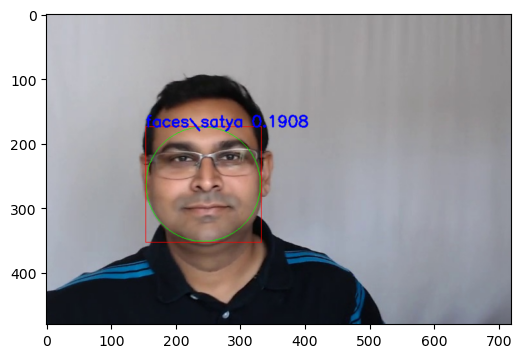

In [12]:
# Show result
plt.imshow(im[:,:,::-1])
plt.show()

# <font style = "color:rgb(50,120,229)">References and Further Reading</font>

1. [http://dlib.net/dlib/dnn/loss_abstract.h.html](http://dlib.net/dlib/dnn/loss_abstract.h.html)

2. [https://arxiv.org/pdf/1503.03832.pdf](https://arxiv.org/pdf/1503.03832.pdf)

3. [http://blog.dlib.net/2017/02/high-quality-face-recognition-with-deep.html](http://blog.dlib.net/2017/02/high-quality-face-recognition-with-deep.html)

4. [https://github.com/davisking/dlib/blob/master/examples/dnn_metric_learning_on_images_ex.cpp](https://github.com/davisking/dlib/blob/master/examples/dnn_metric_learning_on_images_ex.cpp)

5. [https://www.robots.ox.ac.uk/~vgg/publications/2015/Parkhi15/parkhi15.pdf](https://www.robots.ox.ac.uk/~vgg/publications/2015/Parkhi15/parkhi15.pdf)

6. https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/